In [511]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy import optimize 
from matplotlib import gridspec

<IPython.core.display.Javascript object>


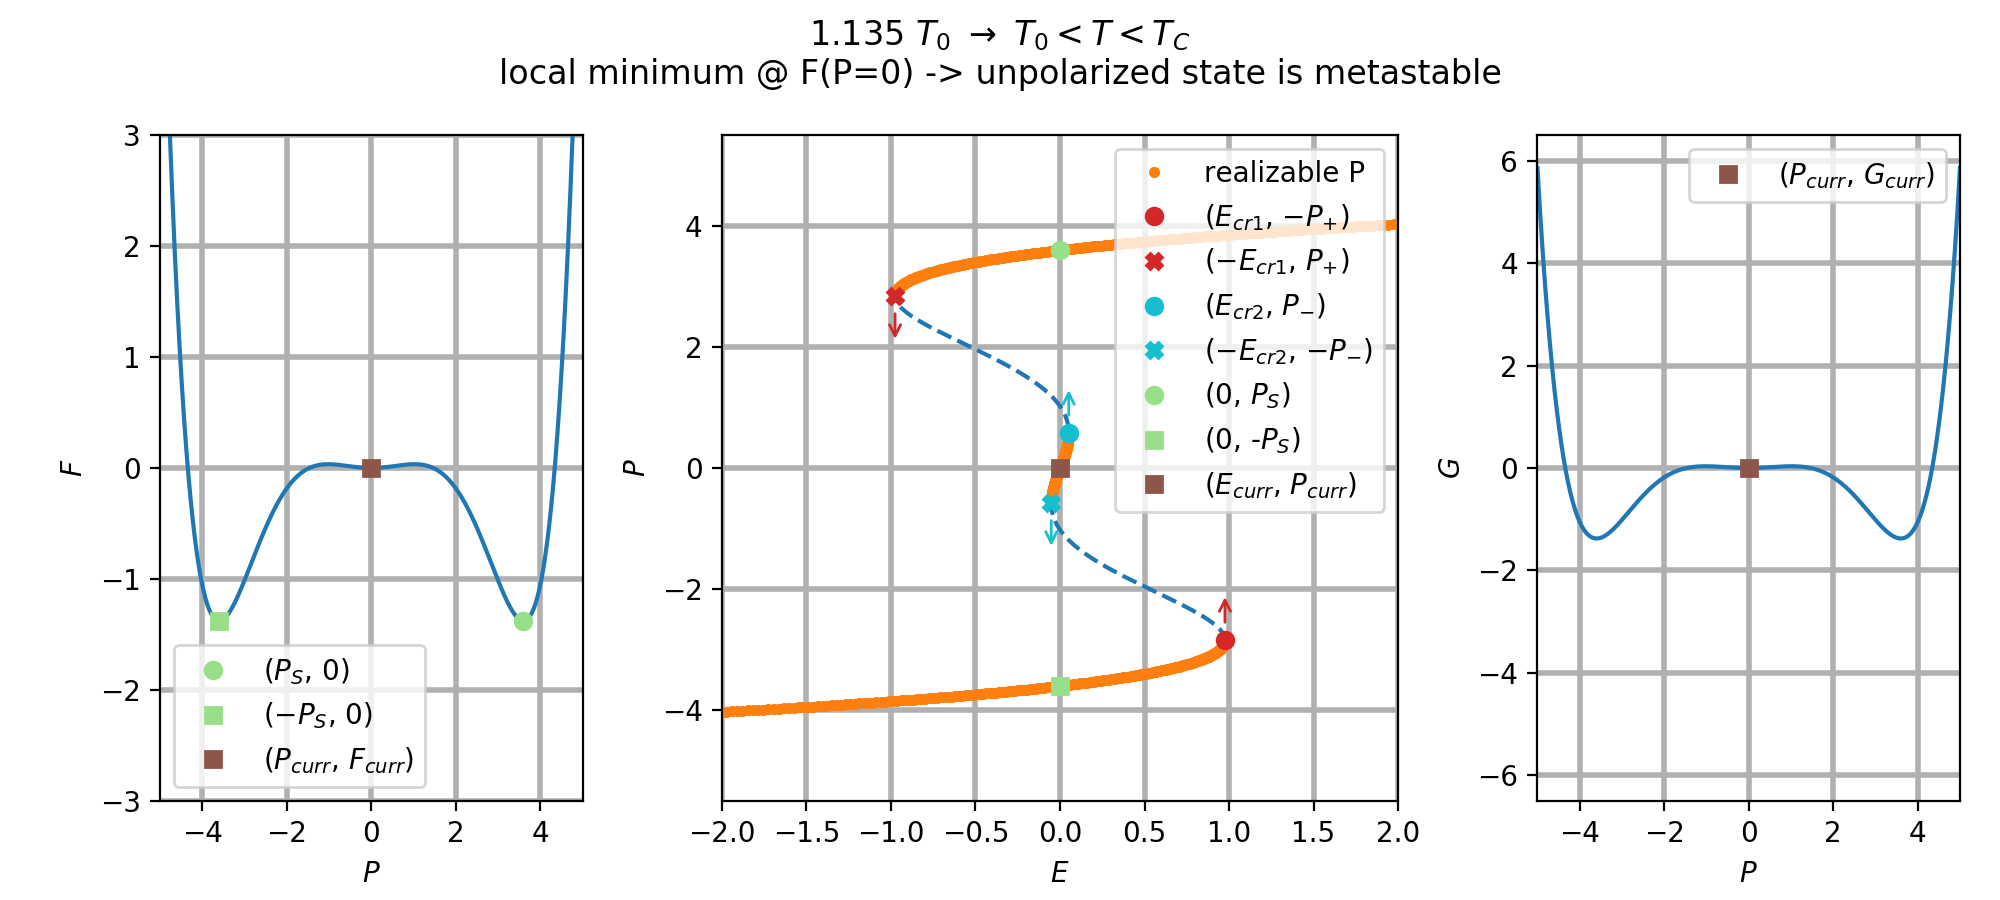

interactive(children=(FloatSlider(value=0.96, description='temperature in T_0', layout=Layout(min_width='1000p…

<function __main__.interactive_plot(T, E_ext, P_curr)>

In [522]:
%matplotlib notebook
colors = plt.cm.get_cmap('tab20').colors

# give parameters to P6 model
F0 = 0
alpha0 = 1
beta = -0.14
gamma = 0.01  
T0 = 1

# initial values for external conditions
T = 0.96
E_ext = 0
P_curr = 0

# measurable parameters and polarization range
P = np.linspace(-5,5,num=2000)

def F(P, T):
    return F0 + alpha0*(T-T0)/2.*P**2 + beta/4.*P**4 + gamma/6.*P**6

def G(P, T, E_ext):
    return F(P, T) - E_ext*P

def E(P, T):
    return alpha0*(T-T0)*P + beta*P**3 + gamma*P**5

def dEdP(P, T):
    return alpha0*(T-T0) + 3*beta*P**2 + 5*gamma*P**4

# create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4.5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1.6, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
plt.subplots_adjust(left = 0.08, right = 0.98, bottom = 0.11, top = 0.85, wspace = 0.275, hspace = 0.2)
ann_list = []

# plot initial P-F graph
curve1, = ax1.plot(P, F(P, T), '-') 
point3a, = ax1.plot(0, 0, '', color=colors[5])
point3b, = ax1.plot(0, 0, '', color=colors[5])
point4a, = ax1.plot(P_curr, F(P_curr, T), 's', color=colors[10], label='($P_{curr}$, $F_{curr}$)')
ax1.set_xlabel('$P$')
ax1.set_ylabel('$F$')
ax1.set_xlim((-5,5))
ax1.set_ylim((-3,3))
ax1.grid(b=True, which='major', linewidth=2)

# plot initial E-P graph
curve2, = ax2.plot(E(P, T), P, '--')
curve2a, = ax2.plot(E(P[dEdP(P, T) > 0], T), P[dEdP(P, T) > 0], '.', label='realizable P')
point1, = ax2.plot(0, 0, '', color=colors[6])
point1a, = ax2.plot(0, 0, '', color=colors[6])
point2, = ax2.plot(0, 0, '', color=colors[18])
point2a, = ax2.plot(0, 0, '', color=colors[18])
point3c, = ax2.plot(0, 0, '', color=colors[5])
point3d, = ax2.plot(0, 0, '', color=colors[5])
point4b, = ax2.plot(E(P_curr, T), P_curr, 's', color=colors[10], label='($E_{curr}$, $P_{curr}$)')
ax2.set_xlabel('$E$')
ax2.set_ylabel('$P$')
ax2.set_xlim((-2,2))
ax2.grid(b=True, which='major', linewidth=2)
ax2.legend()

# plot initial P-G graph
curve3, = ax3.plot(P, G(P, T, E_ext), '-') 
point4c, = ax3.plot(P_curr, G(P_curr, T, E_ext), 's', color=colors[10], label='($P_{curr}$, $G_{curr}$)')
ax3.set_xlabel('$P$')
ax3.set_ylabel('$G$')
ax3.set_xlim((-5,5))
ax3.set_ylim((-6.5,6.5))
ax3.grid(b=True, which='major', linewidth=2)
ax3.legend()

# define updating plot
def interactive_plot(T, E_ext, P_curr):
    # remove old arrows
    for i, a in enumerate(ann_list):
        a.remove()
    ann_list[:] = []
    # update curves of F, E, G
    curve1.set_data(P, F(P, T))
    curve2.set_data(E(P, T), P)
    curve2a.set_data(E(P[dEdP(P, T) > 0], T), P[dEdP(P, T) > 0])
    curve3.set_data(P,G(P, T, E_ext))
    # update points of current polarization state and corresponding F, E, G
    point4a.set_data(P_curr, F(P_curr, T))
    point4b.set_data(E(P_curr, T), P_curr)
    point4c.set_data(P_curr, G(P_curr, T, E_ext))
    # check if temperaure region allows for a coercive field
    atLeastOneCoerciveField = 9*beta**2-20*alpha0*(T-T0)*gamma >= 0
    if atLeastOneCoerciveField:
        # check if temperaure region allows for a sponaneous polarization at E=0
        hasSpontaneousPolarizationatE0 = ((beta**2-4*alpha0*(T-T0)*gamma) / (2*gamma)) > 0
        if hasSpontaneousPolarizationatE0:
            # draw points of spontaneous polarization state and corresponding F, E
            P_S = np.sqrt((-beta + np.sqrt(beta**2-4*alpha0*(T-T0)*gamma)) / (2*gamma))
            point3a.set_data(P_S, F(P_S, T))
            point3a.set_marker('o')
            point3a.set_linestyle('')
            point3a.set_label(r'($P_S$, 0)')
            point3b.set_data(-P_S, F(-P_S, T))
            point3b.set_marker('s')
            point3b.set_linestyle('')
            point3b.set_label(r'($-P_S$, 0)')
            point3c.set_data(0, P_S)
            point3c.set_marker('o')
            point3c.set_linestyle('')
            point3c.set_label(r'(0, $P_S$)')
            point3d.set_data(0, -P_S)
            point3d.set_marker('s')
            point3d.set_linestyle('')
            point3d.set_label(r'(0, -$P_S$)')
        else:
            # remove points of spontaneous polarization state and corresponding F, E
            point3a.set_marker('')
            point3b.set_marker('')
            point3c.set_marker('')
            point3d.set_marker('')
            point3a.set_label('')
            point3b.set_label('')
            point3c.set_label('')
            point3d.set_label('')
        # draw points of coercive fields and corresponding P
        P_plus = np.sqrt((-3*beta + np.sqrt(9*beta**2-20*alpha0*(T-T0)*gamma)) / (10*gamma))
        point1.set_data(E(-P_plus, T), -P_plus)
        point1.set_marker('o')
        point1.set_label(r'($E_{cr1}$, $-P_{\plus}$)')
        point1.set_linestyle('')
        ann = ax2.annotate("", xytext=(E(-P_plus, T), -P_plus+0.2), xy=(E(-P_plus, T), -P_plus+0.8), arrowprops=dict(arrowstyle="->", color=colors[6])) 
        ann_list.append(ann)
        point1a.set_data(E(P_plus, T), P_plus)
        point1a.set_marker('X')
        point1a.set_label(r'($-E_{cr1}$, $P_{\plus}$)')
        point1a.set_linestyle('')
        ann = ax2.annotate("", xytext=(E(P_plus, T), P_plus-0.2), xy=(E(P_plus, T),P_plus-0.8), arrowprops=dict(arrowstyle="->", color=colors[6]))  
        ann_list.append(ann)
        # check if temperaure region allows for a second coercive field
        twoCoerciveFields = -3*beta >= np.sqrt(9*beta**2-20*alpha0*(T-T0)*gamma)
        if twoCoerciveFields:
            # draw points of second coercive fields and corresponding P
            P_minus = np.sqrt((-3*beta - np.sqrt(9*beta**2-20*alpha0*(T-T0)*gamma)) / (10*gamma))
            point2.set_data(E(P_minus, T), P_minus)
            point2.set_marker('o')
            point2.set_label(r'($E_{cr2}$, $P_{\minus}$)')
            point2.set_linestyle('')
            ann = ax2.annotate("", xytext=(E(P_minus, T), P_minus+0.2), xy=(E(P_minus, T), P_minus+0.8), arrowprops=dict(arrowstyle="->", color=colors[18]))  
            ann_list.append(ann)
            point2a.set_data(E(-P_minus, T), -P_minus)
            point2a.set_marker('X')
            point2a.set_label(r'($-E_{cr2}$, $-P_{\minus}$)')
            point2a.set_linestyle('')
            ann = ax2.annotate("", xytext=(E(-P_minus, T), -P_minus-0.2), xy=(E(-P_minus, T), -P_minus-0.8), arrowprops=dict(arrowstyle="->", color=colors[18]))  
            ann_list.append(ann)
        else:
            # remove points of second coercive fields and corresponding P
            point2.set_marker('')
            point2a.set_marker('')
            point2.set_label('')
            point2a.set_label('')
    else:
        # remove points of coercive fields and corresponding P
        point1.set_marker('')
        point1a.set_marker('')
        point1.set_label('')
        point1a.set_label('')
        point2.set_marker('')
        point2a.set_marker('')
        point2.set_label('')
        point2a.set_label('')
    # update figure looks
    ax1.legend()
    ax2.legend()
    region, text = get_region(T)
    fig.suptitle(r'{:.3f} $T_0$ $\rightarrow$ '.format(T) + region + '\n' + text)
    fig.canvas.draw_idle()
    
# get descriptive text   
def get_region(T):
    if T < 1:
        region = r'$T < T_0$'
        text = r'Only polarized states are possible; maximum @ F(P=0) -> unpolarized state is unstable'
    elif T == 1:
        region = r'$T = T_0$'.format(T)
        text = r'$\alpha$ becomes positive, saddle point @ F(P=0) -> unpolarized state becomes metastable'
    elif T < np.round(1 + 3.75*beta**2/(20*alpha0*gamma), 2):
        region = r'$T_0 < T < T_C$'
        text = r'local minimum @ F(P=0) -> unpolarized state is metastable'
    elif T == np.round(1 + 3.75*beta**2/(20*alpha0*gamma), 2):
        region = r'$T = T_C$'
        text = r'all three minima have the same F -> polarized and unpolarized states are energetically equal'
    elif T < np.round(1 + 4*beta**2/(20*alpha0*gamma), 2):
        region = r'$T_C < T < \tilde{T}$'
        text = r'local minima @ F(P=$\pm P_S$) -> polarized states are metastable'
    elif T == np.round(1 + 4*beta**2/(20*alpha0*gamma), 2):
        region = r'$T = \tilde{T}$'
        text = r'still local minima @ F(P=$\pm P_S$) -> polarized states are metastable; $E_{cr1} = E_{cr2}$'
    elif T < np.round(1 + 5*beta**2/(20*alpha0*gamma), 2):
        region = r'$\tilde{T} < T < T_0^*$'
        text = r'still local minima @ F(P=$\pm P_S$) -> polarized states are metastable; $E_{cr1} < E_{cr2}$'
    elif T == np.round(1 + 5*beta**2/(20*alpha0*gamma), 2):
        region = r'$T = T_0^*$'
        text = r'saddle points @ F(P=$\pm P_S$) -> polarized states become unstable if $E_{ext} = 0$; $E_{cr1} = 0$'
    elif T < np.round(1 + 9*beta**2/(20*alpha0*gamma), 2):
        region = r'$T_0^{*} < T < T_0^{**}$'
        text = r'polarized states are unstable if $E_{ext} = 0$; $E_{cr1} < 0$'
    elif T == np.round(1 + 9*beta**2/(20*alpha0*gamma), 2):
        region = r'$T = T_0^{**}$'
        text = r'polarized states are unstable if $E_{ext} = 0$; $E_{cr1} = -E_{cr2}$ $\rightarrow$ field-induced spontaneous polarization vanishes'
    else:
        region = r'$T > T_0^{**}$'
        text = r'polarized states are unstable if $E_{ext} = 0$; no field-induced spontaneous polarization'
    return region, text
    

# make sliders
widgets.interact(interactive_plot,
                 T = widgets.FloatSlider(
                    value=0.96,
                    min=0.96,
                    max=np.round(1 + 9*beta**2/(20*alpha0*gamma), 2)*1.05,
                    step=0.005,
                    description='temperature in T_0',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.2f',
                    style = {'description_width': 'initial'},
                    layout = {'min_width':'1000px'}
                    ),
                 E_ext = widgets.FloatSlider(
                    value=0.0,
                    min=-1,
                    max=1,
                    step=0.01,
                    description='external E',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.2f',
                    style = {'description_width': 'initial'},
                    layout = {'min_width':'1000px'}
                    ),
                 P_curr = widgets.FloatSlider(
                    value=0.0,
                    min=-4,
                    max=4,
                    step=0.01,
                    description='polarization state',
                    disabled=False,
                    continuous_update=True,
                    orientation='horizontal',
                    readout=True,
                    readout_format='.2f',
                    style = {'description_width': 'initial'},
                    layout = {'min_width':'1000px'}
                    )
                 )